# Seminar - debugging _etc._

Main topic of this seminar is debugging.  I'll give you some robot code that doesn't work, and I'll ask you to find out why.

We'll briefly touch on programming in general, and C!

## Getting started

Either:

- Click [this link](https://colab.research.google.com/github/engmaths/SEMT10002_2024/blob/main/weekly_seminars/Seminar_03_Debugging_etc.ipynb) to open this notebook in Google colab.
- You will need to download the simulator library using the cell below.

or

- Download it to your local computer using `git clone https://github.com/engmaths/SEMT10002_2024` or just use `git pull` to refresh if you've done this already.
- Navigate to the subfolder `consolidation_exercises/Week_05_robot` and open the notebook `week_05_consolidation_robots.ipynb`.

In [11]:
import sys
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/engmaths/SEMT10002_2024/refs/heads/main/consolidation_exercises/Week_05_robot/cpa_robot.py

## Debugging challenge

The code below is aiming to drive to 50,50. i.e. the centre of the circle, by finding the circle, driving to the top of it, and then driving due "south".

But there are *five* errors in this code.  I'd like you to find and fix them, *without* plotting the robot path.

Top tips

 - Work by adding `print` statements to check on progress through the code.  What's happening inside?  Is it what you expect?  Which bits of code are running when?
 - Work from top to bottom.  Early problems may give rise to later consequences, so you can fix the second stage without fixing the first.

made it to the line
Aiming for 50,50 and got to 50.95699959979345 50.001321847510084


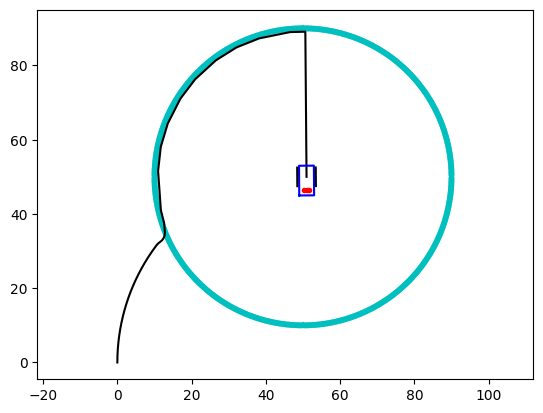

In [35]:
from cpa_robot import position_x, position_y, orientation, drive, reset_robot, sensor_left, sensor_middle, plot_path
from math import pi
reset_robot()

NORMAL_DRIVE = 1.0
SLOW_DRIVE = 0.1
# step 1 - drive until on line
for _ in range(1000):
    drive(1.1*SLOW_DRIVE,SLOW_DRIVE) #CHANGE: fix "DRIVE" typo
    if sensor_middle() == True:
        print("made it to the line")
        break
# step 2 - follow line to x = 50
for _ in range(500):
    if position_x() >= 50:
        break
    if sensor_middle():
        drive(NORMAL_DRIVE,SLOW_DRIVE) # CHANGE: 2nd argument to "NORMAL_DRIVE"
    elif not sensor_left():
        drive(SLOW_DRIVE,NORMAL_DRIVE)
    else:
        drive(NORMAL_DRIVE,NORMAL_DRIVE)
# step 3 - turn to face due "down"
for _ in range(50):
    TARGET_ANGLE = pi # 5pi same angle as pi
    error = orientation() - TARGET_ANGLE
    K = 0.25
    drive(-K*error,K*error)
# step 4 - drive to y = 50
distance = position_y() - 50
drive(distance,distance)
print('Aiming for 50,50 and got to',position_x(),position_y())
plot_path()

## When shortcuts turn against you

Python has some features that can make the language elegant, but can also mask problems.  I always advocate that a few extra lines are a tiny price for confidence and clarity.

In [1]:
if '???':
    print('what the?')

what the?


##  Parting thought on programming

With the exception of _arrays_ (which Python calls _lists_, among other things) we have now covered the basis of all programming... ever.

Here's some code in C.  What does it do?  How do you know?  What's different from Python?

```C
#include <stdio.h>
#include <math.h>

int main(){
    double M = 1.54;
    double e = 0.3;
    double E;
    double newE;

    E=M;
    int ii;
    for (ii=0; ii<100; ii++) {
        printf("Iteration %d value of E is %lf",ii,E);
        newE = M + e*sin(E);
        if (abs(newE-E)<1e-9) {
            break;
        }
        else {
            E = newE;
        }
    }
    return(0);
}
```